# Anomaly Detection

In [105]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
#load csv
df = pd.read_csv('checkout_sales_last_hour.csv')
df_copy = pd.read_csv('checkout_sales_last_hour.csv')
df

,time,avg_last_30days,avg_last_7days,same_day_last_week,yesterday,today
0,00h,13.60,14.4,16.0,9.0,14.0
1,01h,4.90,5.2,2.0,4.0,6.0
2,02h,2.75,2.0,3.0,1.0,2.0
3,03h,1.15,0.6,1.0,1.0,NaN
4,04h,1.20,1.4,1.0,NaN,NaN
5,05h,0.80,1.0,NaN,NaN,1.0
6,06h,3.80,3.4,2.0,2.0,13.0
7,07h,13.25,13.2,15.0,10.0,10.0
8,08h,28.55,29.2,41.0,25.0,33.0
9,09h,46.00,48.0,45.0,49.0,50.0


In [193]:
#data cleaning
df_copy = df_copy.fillna(0)
df = df.fillna(0)

In [213]:
#calculations to determine z-scores
df['avg_trx'] = df[['avg_last_30days','avg_last_7days','same_day_last_week','yesterday']].mean(axis=1).round(2)
df['std'] = df[['avg_last_30days','avg_last_7days','same_day_last_week','yesterday']].std(axis=1).round(2)
df['z_score'] = (df['today']-df['avg_trx'])/df['std']

#determine whether z-score is above threshold and therefore is an outlier
#in this particular case we only care about a significant increase in transactions so we ignore a negative z-score
#99% of values have a z-score between-3 and 3 
threshold = 3
#df['outlier'] = np.where(df['z_score'] >= threshold, 1, np.where(df['z_score'] <-abs(threshold), 1, 0))
df['outlier'] = np.where(df['z_score'] >= threshold, 1, 0)

In [214]:
#show dataframe
df

,time,avg_last_30days,avg_last_7days,same_day_last_week,yesterday,today,avg_trx,std,z_score,outlier
0,00h,13.60,14.4,16.0,9.0,14.0,13.25,3.00,0.250000,0
1,01h,4.90,5.2,2.0,4.0,6.0,4.03,1.44,1.368056,0
2,02h,2.75,2.0,3.0,1.0,2.0,2.19,0.90,-0.211111,0
3,03h,1.15,0.6,1.0,1.0,0.0,0.94,0.24,-3.916667,0
4,04h,1.20,1.4,1.0,0.0,0.0,0.90,0.62,-1.451613,0
5,05h,0.80,1.0,0.0,0.0,1.0,0.45,0.53,1.037736,0
6,06h,3.80,3.4,2.0,2.0,13.0,2.80,0.94,10.851064,1
7,07h,13.25,13.2,15.0,10.0,10.0,12.86,2.08,-1.375000,0
8,08h,28.55,29.2,41.0,25.0,33.0,30.94,6.96,0.295977,0
9,09h,46.00,48.0,45.0,49.0,50.0,47.00,1.83,1.639344,0


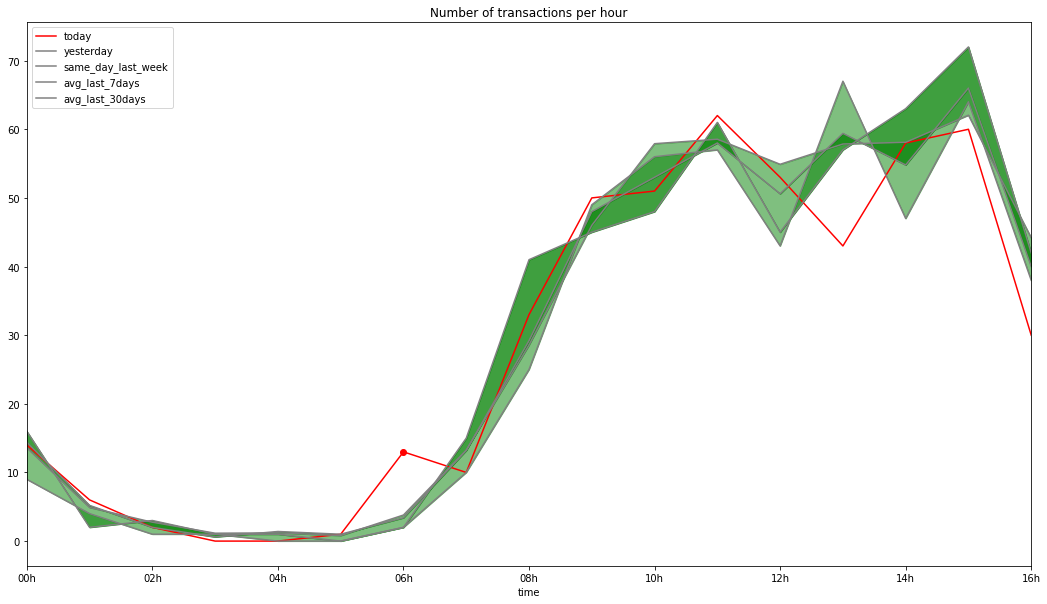

In [217]:
#visualize transactions per hour including outliers
plt.figure(figsize=(18,10))
ax = plt.gca()

#define y_values for plotting
x = df_copy['time'].values
y = df_copy['yesterday'].values
y_2 = df_copy['same_day_last_week'].values
y_3 = df_copy['avg_last_7days'].values
y_4 = df_copy['avg_last_30days'].values
today = df_copy['today'].values
outliers = df['outlier'].values

#define axis
plt.title('Number of transactions per hour')
df_copy.plot(kind='line',x='time',y='today',ax=ax, color='red')
df_copy.plot(kind='line',x='time',y='yesterday',ax=ax,color='grey')
df_copy.plot(kind='line',x='time',y='same_day_last_week',ax=ax,color='grey')
df_copy.plot(kind='line',x='time',y='avg_last_7days',ax=ax,color='grey')
df_copy.plot(kind='line',x='time',y='avg_last_30days',ax=ax,color='grey')

#fill area between lines
plt.fill_between(x, y, y_2, color='green', alpha='0.5')
plt.fill_between(x, y_2, y_3, color='green', alpha='0.5')
plt.fill_between(x, y_3, y_4, color='green', alpha='0.5')

#highlight outliers 
for i in range(0,len(df)):
    if outliers[i] >= 1:
        plt.scatter(i,today[i], color='red', marker='o', label='outlier')
    else:
        pass 

plt.show()
